# RDF: Accumulating g(r) for a Fluid

The `freud.density` module is intended to compute a variety of quantities that relate spatial distributions of particles with other particles.
This example demonstrates the calculation of the [radial distribution function](https://en.wikipedia.org/wiki/Radial_distribution_function) $g(r)$ for a fluid, averaged over multiple frames.

In [1]:
import numpy as np
import freud
from util import box_2d_to_points
import matplotlib.pyplot as plt
%matplotlib inline

data_path = "ex_data/phi065"
box_data = np.load("{}/box_data.npy".format(data_path))
pos_data = np.load("{}/pos_data.npy".format(data_path))

def plot_rdf(box_arr, points_arr, prop, rmax=10, dr=0.1, label=None, ax=None):
    """Helper function for plotting RDFs."""
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(12, 8))
        ax.set_title(prop, fontsize=16)
    rdf = freud.density.RDF(rmax, dr)
    for box, points in zip(box_arr, points_arr):
        rdf.accumulate(box, points)
    if label is not None:
        ax.plot(rdf.R, getattr(rdf, prop), label=label)
        ax.legend()
    else:
        ax.plot(rdf.R, getattr(rdf, prop))    
    return ax

Here, we show the difference between the RDF of one frame and an accumulated (averaged) RDF from several frames. Including more frames makes the plot smoother.

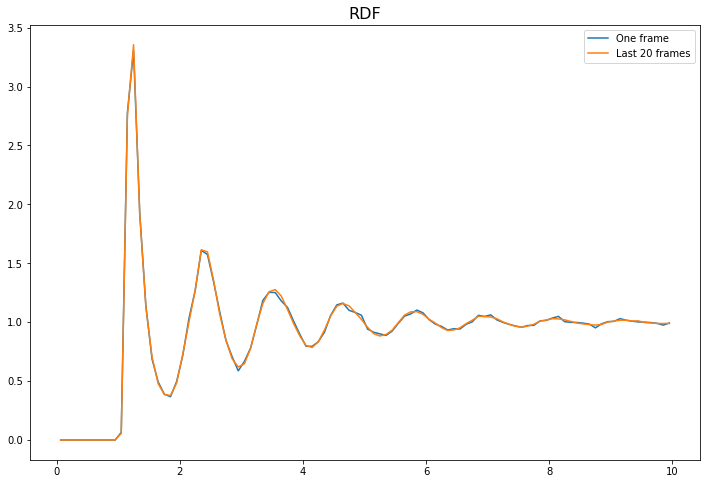

In [2]:
# Compute the RDF for the last frame
box_arr = [box_data[-1].tolist()]
pos_arr = [pos_data[-1]]
ax = plot_rdf(box_arr, pos_arr, 'RDF', dr=0.1, label='One frame')

# Compute the RDF for the last 20 frames
box_arr = [box.tolist() for box in box_data[-20:]]
pos_arr = pos_data[-20:]
ax = plot_rdf(box_arr, pos_arr, 'RDF', dr=0.1, label='Last 20 frames', ax=ax)

plt.show()

The difference between `accumulate` (which should be called on a series of frames) and `compute` (meant for a single frame) is more striking for smaller bin sizes, which are statistically noisier.

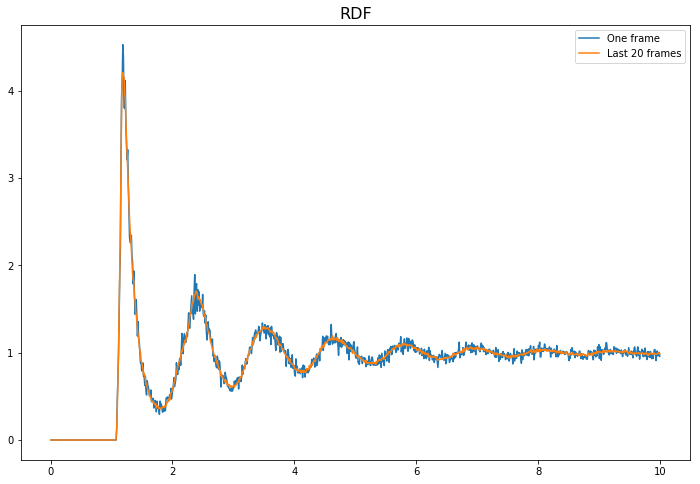

In [3]:
# Compute the RDF for the last frame
box_arr = [box_data[-1].tolist()]
pos_arr = [pos_data[-1]]
ax = plot_rdf(box_arr, pos_arr, 'RDF', dr=0.01, label='One frame')

# Compute the RDF for the last 20 frames
box_arr = [box.tolist() for box in box_data[-20:]]
pos_arr = pos_data[-20:]
ax = plot_rdf(box_arr, pos_arr, 'RDF', dr=0.01, label='Last 20 frames', ax=ax)

plt.show()